# Autoencoder for feature extraction

## Importing the libraries

In [1]:
from __future__ import absolute_import, division, print_function

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

## Importing the MNIST dataset

In [2]:
from tensorflow.keras.datasets import mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [3]:
X_train = X_train[:10000, :, :].reshape(10000, 28 * 28).astype(np.float32)
y_train = y_train[:10000]
X_test = X_test[:5000, :, :].reshape(5000, 28 * 28).astype(np.float32)
y_test = y_test[:5000]

In [4]:
# Rescaling the dataset to the range [0, 1]
X_train, X_test = X_train / 255., X_test / 255.

## Autoencoder

### Parameters

In [5]:
# MNIST Dataset parameters.
n_features = 28 * 28 # data features (img shape: 28*28).

# Training parameters.
learning_rate = 0.01
training_steps = 30000
batch_size = 256
display_step = 1000

# Network Parameters
n_hidden_1 = 50 # 1st layer num features.
n_hidden_2 = 50 # 2nd layer num features.
n_hidden_3 = 5  # 3rd layer num features (the latent dim).

### Preparing the dataset

In [6]:
# Use tf.data API to shuffle and batch data.
# Prefetch batch (pre-load batch for faster consumption).
train_data = tf.data.Dataset.from_tensor_slices((X_train, y_train))
train_data = train_data.repeat().shuffle(10000).batch(batch_size).prefetch(1)

test_data = tf.data.Dataset.from_tensor_slices((X_test, y_test))
test_data = test_data.repeat().batch(batch_size).prefetch(1)

### Pretraining using Restricted Boltzmann Machine

In [7]:
from restricted_boltzmann_machine_tf2 import RBM

In [8]:
rbm_1 = RBM(n_visible=n_features, n_hidden=n_hidden_1)
rbm_1.fit(X=X_train, training_steps=30000, batch_size=batch_size)

Step 0, loss: 0.23169802129268646
Step 1000, loss: 0.05056941136717796
Step 2000, loss: 0.043234337121248245
Step 3000, loss: 0.03679727390408516
Step 4000, loss: 0.03521275147795677
Step 5000, loss: 0.03400471806526184
Step 6000, loss: 0.03176131844520569
Step 7000, loss: 0.0310378260910511
Step 8000, loss: 0.031424760818481445
Step 9000, loss: 0.028875501826405525
Step 10000, loss: 0.02919154241681099
Step 11000, loss: 0.02883090265095234
Step 12000, loss: 0.028635716065764427
Step 13000, loss: 0.02755877375602722
Step 14000, loss: 0.028179079294204712
Step 15000, loss: 0.02908572368323803
Step 16000, loss: 0.027441900223493576
Step 17000, loss: 0.027257053181529045
Step 18000, loss: 0.0272077489644289
Step 19000, loss: 0.026032550260424614
Step 20000, loss: 0.02773207053542137
Step 21000, loss: 0.027071073651313782
Step 22000, loss: 0.02621741034090519
Step 23000, loss: 0.027161290869116783
Step 24000, loss: 0.025893494486808777
Step 25000, loss: 0.026553116738796234
Step 26000, los

In [9]:
rbm_2 = RBM(n_visible=n_hidden_1, n_hidden=n_hidden_2)
rbm_2.fit(X=rbm_1.probabilities_hidden(X_train), training_steps=30000, batch_size=batch_size)

Step 0, loss: 0.22731265425682068
Step 1000, loss: 0.18362529575824738
Step 2000, loss: 0.14377769827842712
Step 3000, loss: 0.11947239190340042
Step 4000, loss: 0.10216069966554642
Step 5000, loss: 0.09234887361526489
Step 6000, loss: 0.08726800978183746
Step 7000, loss: 0.0804339200258255
Step 8000, loss: 0.07899197190999985
Step 9000, loss: 0.07882899791002274
Step 10000, loss: 0.07409132272005081
Step 11000, loss: 0.06680729985237122
Step 12000, loss: 0.06601288169622421
Step 13000, loss: 0.06421448290348053
Step 14000, loss: 0.06170494481921196
Step 15000, loss: 0.05931316316127777
Step 16000, loss: 0.059454403817653656
Step 17000, loss: 0.055604323744773865
Step 18000, loss: 0.05723677948117256
Step 19000, loss: 0.05417921021580696
Step 20000, loss: 0.055895376950502396
Step 21000, loss: 0.05355459824204445
Step 22000, loss: 0.05299929529428482
Step 23000, loss: 0.052658386528491974
Step 24000, loss: 0.05361250787973404
Step 25000, loss: 0.053025759756565094
Step 26000, loss: 0.0

In [10]:
rbm_3 = RBM(n_visible=n_hidden_2, n_hidden=n_hidden_3)
rbm_3.fit(X=rbm_2.probabilities_hidden(rbm_1.probabilities_hidden(X_train)), training_steps=30000, batch_size=batch_size)

Step 0, loss: 0.17909739911556244
Step 1000, loss: 0.14577893912792206
Step 2000, loss: 0.13787373900413513
Step 3000, loss: 0.1296902745962143
Step 4000, loss: 0.11762060225009918
Step 5000, loss: 0.1153063178062439
Step 6000, loss: 0.11218530684709549
Step 7000, loss: 0.10882458835840225
Step 8000, loss: 0.10833875834941864
Step 9000, loss: 0.10228630155324936
Step 10000, loss: 0.10539498925209045
Step 11000, loss: 0.10269191861152649
Step 12000, loss: 0.1002061665058136
Step 13000, loss: 0.09599446505308151
Step 14000, loss: 0.09630197286605835
Step 15000, loss: 0.0942096933722496
Step 16000, loss: 0.09718762338161469
Step 17000, loss: 0.09607157111167908
Step 18000, loss: 0.0931389257311821
Step 19000, loss: 0.09787137806415558
Step 20000, loss: 0.09413106739521027
Step 21000, loss: 0.09443167597055435
Step 22000, loss: 0.09423800557851791
Step 23000, loss: 0.09518615901470184
Step 24000, loss: 0.09550347924232483
Step 25000, loss: 0.09369440376758575
Step 26000, loss: 0.0944022387

In [11]:
rbm_1._weights

<tf.Tensor: id=2190160, shape=(784, 50), dtype=float32, numpy=
array([[-0.15906677, -0.4451187 , -0.35089222, ..., -0.31300035,
        -0.24466224, -0.29807496],
       [-0.1572324 , -0.44700402, -0.3800831 , ..., -0.30114046,
        -0.23809646, -0.3003903 ],
       [-0.1510073 , -0.43031022, -0.35515714, ..., -0.32477218,
        -0.2378833 , -0.30065268],
       ...,
       [-0.15144649, -0.43621457, -0.35773644, ..., -0.30360577,
        -0.23155974, -0.30120346],
       [-0.16263293, -0.4559549 , -0.37165236, ..., -0.3130858 ,
        -0.25433537, -0.29670545],
       [-0.17187457, -0.4336571 , -0.37153536, ..., -0.30593592,
        -0.23060408, -0.3038839 ]], dtype=float32)>

### Autoencoder architecture

In [12]:
# Store layers weight & bias

# Using pretrained RBM to initialize weights.
random_normal = tf.initializers.RandomNormal()

weights = {
    'encoder_h1': tf.Variable(tf.identity(rmb_1._weights)),
    'encoder_h2': tf.Variable(tf.identity(rmb_2._weights)),
    'encoder_h3': tf.Variable(tf.identity(rmb_3._weights)),
    'decoder_h1': tf.Variable(tf.transpose(tf.identity(rmb_3._weights))),
    'decoder_h2': tf.Variable(tf.transpose(tf.identity(rmb_2._weights))),
    'decoder_h3': tf.Variable(tf.transpose(tf.identity(rmb_1._weights))),
}

biases = {
    'encoder_b1': tf.Variable(random_normal([n_hidden_1])),
    'encoder_b2': tf.Variable(random_normal([n_hidden_2])),
    'encoder_b3': tf.Variable(random_normal([n_hidden_3])),
    'decoder_b1': tf.Variable(random_normal([n_hidden_2])),
    'decoder_b2': tf.Variable(random_normal([n_hidden_1])),
    'decoder_b3': tf.Variable(random_normal([n_features])),
}

### Building the encoder and decoder

In [13]:
# Building the encoder.
def encoder(x):
    # Encoder Hidden layer with sigmoid activation
    layer_1 = tf.nn.sigmoid(tf.add(tf.matmul(x, weights['encoder_h1']), biases['encoder_b1']))
    # Encoder Hidden layer with sigmoid activation
    layer_2 = tf.nn.sigmoid(tf.add(tf.matmul(layer_1, weights['encoder_h2']), biases['encoder_b2']))
    # Encoder Hidden layer with sigmoid activation
    layer_3 = tf.nn.sigmoid(tf.add(tf.matmul(layer_2, weights['encoder_h3']), biases['encoder_b3']))
    
    return layer_3

# Building the decoder.
def decoder(x):
    # Decoder Hidden layer with sigmoid activation
    layer_1 = tf.nn.sigmoid(tf.add(tf.matmul(x, weights['decoder_h1']), biases['decoder_b1']))
    # Decoder Hidden layer with sigmoid activation
    layer_2 = tf.nn.sigmoid(tf.add(tf.matmul(layer_1, weights['decoder_h2']), biases['decoder_b2']))
    # Decoder Hidden layer with sigmoid activation
    layer_3 = tf.nn.sigmoid(tf.add(tf.matmul(layer_2, weights['decoder_h3']), biases['decoder_b3']))
    
    return layer_3

### Defining loss function and optimizer

In [14]:
# Mean square loss between the original and reconstructed images.
def mean_square(reconstructed, original):
    return tf.reduce_mean(tf.pow(original - reconstructed, 2))

# Adam optimizer
optimizer = tf.optimizers.Adam(learning_rate=learning_rate)

In [15]:
# Optimization process.
def run_optimization(x):
    # Wrap computation inside a GradientTape for automatic differentiation.
    with tf.GradientTape() as g:
        reconstructed_image = decoder(encoder(x))
        loss = mean_square(reconstructed_image, x)
    
    # Variables to update, i.e. trainable variables.
    trainable_variables = list(weights.values()) + list(biases.values())
    
    # Compute gradients.
    gradients = g.gradient(loss, trainable_variables)
    
    # Update W and b following gradients.
    optimizer.apply_gradients(zip(gradients, trainable_variables))
    
    return loss

### Fitting the autoencoder

In [16]:
# Run training for the given number of steps.
for step, (batch_x, _) in enumerate(train_data.take(training_steps + 1)):
    # Run the optimization.
    loss = run_optimization(batch_x)
    
    if step % display_step == 0:
        print('step: {}, loss: {}'.format(step, loss))

step: 0, loss: 0.06906984001398087
step: 1000, loss: 0.031983524560928345
step: 2000, loss: 0.027561005204916
step: 3000, loss: 0.026433531194925308
step: 4000, loss: 0.024534130468964577
step: 5000, loss: 0.025674965232610703
step: 6000, loss: 0.024189278483390808
step: 7000, loss: 0.025080634281039238
step: 8000, loss: 0.024034548550844193
step: 9000, loss: 0.02461622655391693
step: 10000, loss: 0.02425694651901722
step: 11000, loss: 0.02449747733771801
step: 12000, loss: 0.025836952030658722
step: 13000, loss: 0.023222027346491814
step: 14000, loss: 0.023139983415603638
step: 15000, loss: 0.023869194090366364
step: 16000, loss: 0.02312016300857067
step: 17000, loss: 0.023601021617650986
step: 18000, loss: 0.02162465825676918
step: 19000, loss: 0.02315024472773075
step: 20000, loss: 0.023460140451788902
step: 21000, loss: 0.02305595763027668
step: 22000, loss: 0.022504767403006554
step: 23000, loss: 0.023201923817396164
step: 24000, loss: 0.02289714105427265
step: 25000, loss: 0.0221

### Visualization of the result

Original Images


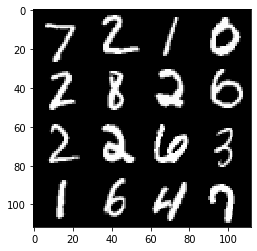

Reconstructed Images


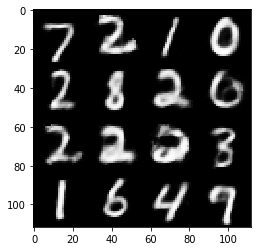

In [17]:
# Encode and decode images from test set and visualize their reconstruction.
n = 4
canvas_orig = np.empty((28 * n, 28 * n))
canvas_recon = np.empty((28 * n, 28 * n))
for i, (batch_x, _) in enumerate(test_data.take(n)):
    # Encode and decode the digit image.
    reconstructed_images = decoder(encoder(batch_x))
    # Display original images.
    for j in range(n):
        # Draw the generated digits.
        img = batch_x[j].numpy().reshape([28, 28])
        canvas_orig[i * 28:(i + 1) * 28, j * 28:(j + 1) * 28] = img
    # Display reconstructed images.
    for j in range(n):
        # Draw the generated digits.
        reconstr_img = reconstructed_images[j].numpy().reshape([28, 28])
        canvas_recon[i * 28:(i + 1) * 28, j * 28:(j + 1) * 28] = reconstr_img

print("Original Images")     
plt.figure(figsize=(n, n))
plt.imshow(canvas_orig, origin="upper", cmap="gray")
plt.show()

print("Reconstructed Images")
plt.figure(figsize=(n, n))
plt.imshow(canvas_recon, origin="upper", cmap="gray")
plt.show()

## Feature extraction and fitting a simple classifier

In [18]:
encoder(X_test)

<tf.Tensor: id=10651234, shape=(5000, 5), dtype=float32, numpy=
array([[0.63222826, 0.04184642, 0.6606653 , 0.36354452, 0.93683314],
       [0.02824819, 0.6212084 , 0.7547623 , 0.7523118 , 0.09911186],
       [0.78892964, 0.91654766, 0.8107109 , 0.81813765, 0.49375087],
       ...,
       [0.17643076, 0.4009742 , 0.5585717 , 0.77177024, 0.03427184],
       [0.40404993, 0.6151297 , 0.44144124, 0.24344641, 0.64750725],
       [0.12404066, 0.11575192, 0.14149296, 0.06492996, 0.12620738]],
      dtype=float32)>

In [19]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()

In [20]:
classifier.fit(encoder(X_train), y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [21]:
accuracy = classifier.score(encoder(X_test), y_test)
print('Accuracy: {}%'.format(accuracy * 100))

Accuracy: 77.12%
